# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 641


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid=" + weather_api_key +"&units=imperial"

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    
    except Exception as e:
        import traceback
        print(traceback.format_exc())
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-gentil
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | belushya guba
Traceback (most recent call last):
  File "/var/folders/xw/z2rhr7zj1kvg3zdq580t0_340000gp/T/ipykernel_35096/1807188804.py", line 35, in <module>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'

Processing Record 4 of Set 1 | shatoy
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | mount vernon
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | illoqqortoormiut
Traceback (most recent call last):
  File "/var/folders/xw/z2rhr7zj1kvg3zdq580t0_340000gp/T/ipykernel_35096/1807188804.py", line 35, in <module>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'

Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | el alto
Processing Record 12 of Set 1 | nisia floresta
Proc

Traceback (most recent call last):
  File "/var/folders/xw/z2rhr7zj1kvg3zdq580t0_340000gp/T/ipykernel_35096/1807188804.py", line 35, in <module>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'

Processing Record 20 of Set 3 | jamestown
Processing Record 21 of Set 3 | lompoc
Processing Record 22 of Set 3 | nelson bay
Processing Record 23 of Set 3 | montbrison
Processing Record 24 of Set 3 | vardo
Processing Record 25 of Set 3 | ulladulla
Processing Record 26 of Set 3 | victoria
Processing Record 27 of Set 3 | puerto del rosario
Processing Record 28 of Set 3 | marystown
Processing Record 29 of Set 3 | sur
Processing Record 30 of Set 3 | vaini
Processing Record 31 of Set 3 | dwarka
Processing Record 32 of Set 3 | yerofey pavlovich
Processing Record 33 of Set 3 | vao
Processing Record 34 of Set 3 | nikolskoye
Processing Record 35 of Set 3 | tasiilaq
Processing Record 36 of Set 3 | doka
Processing Record 37 of Set 3 | asaba
Processing Record 38 of Set 3 | bac lieu
Processing R

Processing Record 15 of Set 6 | kosonsoy
Processing Record 16 of Set 6 | kirakira
Processing Record 17 of Set 6 | nigran
Processing Record 18 of Set 6 | barrhead
Processing Record 19 of Set 6 | namie
Processing Record 20 of Set 6 | carnarvon
Processing Record 21 of Set 6 | katherine
Processing Record 22 of Set 6 | ugoofaaru
Processing Record 23 of Set 6 | san-pedro
Processing Record 24 of Set 6 | rawson
Processing Record 25 of Set 6 | constitucion
Processing Record 26 of Set 6 | cidreira
Processing Record 27 of Set 6 | les cayes
Processing Record 28 of Set 6 | manta
Processing Record 29 of Set 6 | lazi
Processing Record 30 of Set 6 | sorong
Processing Record 31 of Set 6 | bilma
Processing Record 32 of Set 6 | whitehaven
Processing Record 33 of Set 6 | bulawayo
Processing Record 34 of Set 6 | tefe
Processing Record 35 of Set 6 | sorland
Processing Record 36 of Set 6 | rocha
Processing Record 37 of Set 6 | serik
Processing Record 38 of Set 6 | utrecht
Processing Record 39 of Set 6 | ostr

Processing Record 10 of Set 9 | tuatapere
Processing Record 11 of Set 9 | talnakh
Processing Record 12 of Set 9 | wanaka
Processing Record 13 of Set 9 | rio branco
Processing Record 14 of Set 9 | labytnangi
Processing Record 15 of Set 9 | nalut
Processing Record 16 of Set 9 | navolato
Processing Record 17 of Set 9 | khonuu
Traceback (most recent call last):
  File "/var/folders/xw/z2rhr7zj1kvg3zdq580t0_340000gp/T/ipykernel_35096/1807188804.py", line 35, in <module>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'

Processing Record 18 of Set 9 | kajaani
Processing Record 19 of Set 9 | ulaangom
Processing Record 20 of Set 9 | marcona
Traceback (most recent call last):
  File "/var/folders/xw/z2rhr7zj1kvg3zdq580t0_340000gp/T/ipykernel_35096/1807188804.py", line 35, in <module>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'

Processing Record 21 of Set 9 | matiri
Processing Record 22 of Set 9 | karkaralinsk
Traceback (most recent call last):
  File "/var/folder

Processing Record 47 of Set 11 | mandal
Processing Record 48 of Set 11 | ovsyanka
Processing Record 49 of Set 11 | teahupoo
Processing Record 0 of Set 12 | velyka bilozerka
Processing Record 1 of Set 12 | scottsburgh
Traceback (most recent call last):
  File "/var/folders/xw/z2rhr7zj1kvg3zdq580t0_340000gp/T/ipykernel_35096/1807188804.py", line 35, in <module>
    city_lat = city_weather['coord']['lat']
KeyError: 'coord'

Processing Record 2 of Set 12 | horsham
Processing Record 3 of Set 12 | cocal
Processing Record 4 of Set 12 | khandyga
Processing Record 5 of Set 12 | surt
Processing Record 6 of Set 12 | tuy hoa
Processing Record 7 of Set 12 | blantyre
Processing Record 8 of Set 12 | retz
Processing Record 9 of Set 12 | mandali
Processing Record 10 of Set 12 | paamiut
Processing Record 11 of Set 12 | kattivakkam
Processing Record 12 of Set 12 | smidovich
Processing Record 13 of Set 12 | londonderry
Processing Record 14 of Set 12 | rokycany
Processing Record 15 of Set 12 | dromolaxia
P

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Convert Date time from Unix to local time
city_data_df["Date"]=(pd.to_datetime(city_data_df["Date"],unit='s')) 


# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-gentil,-0.7193,8.7815,78.76,94,75,4.61,GA,2023-02-02 06:54:26
1,port elizabeth,-33.9180,25.5701,75.09,74,0,10.36,ZA,2023-02-02 06:54:27
2,shatoy,42.8714,45.6886,38.93,73,100,1.10,RU,2023-02-02 06:54:28
3,hithadhoo,-0.6000,73.0833,81.46,73,41,17.58,MV,2023-02-02 06:54:29
4,mount vernon,40.9126,-73.8371,31.66,53,75,9.22,US,2023-02-02 06:54:30


In [7]:
path = '/Users/Justin/Documents/Bootcamp_Home folder/homework/Module 6/python-api-challenge'

In [8]:
# Export the City_Data into a csv
city_data_df.to_csv(path + "/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv(path + "/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-gentil,-0.7193,8.7815,78.76,94,75,4.61,GA,2023-02-02 06:54:26
1,port elizabeth,-33.9180,25.5701,75.09,74,0,10.36,ZA,2023-02-02 06:54:27
2,shatoy,42.8714,45.6886,38.93,73,100,1.10,RU,2023-02-02 06:54:28
3,hithadhoo,-0.6000,73.0833,81.46,73,41,17.58,MV,2023-02-02 06:54:29
4,mount vernon,40.9126,-73.8371,31.66,53,75,9.22,US,2023-02-02 06:54:30


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

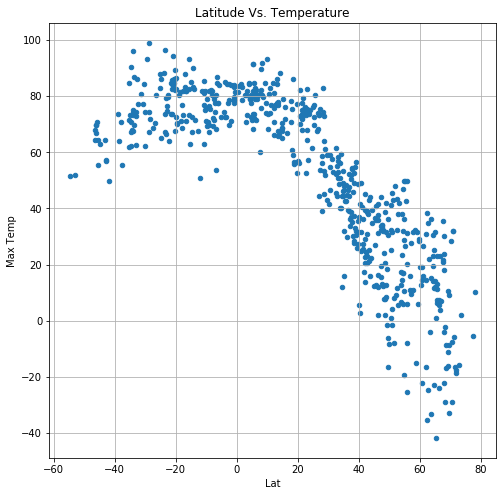

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
              title="Latitude Vs. Temperature")

# Save the figure
plt.savefig(path + "/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

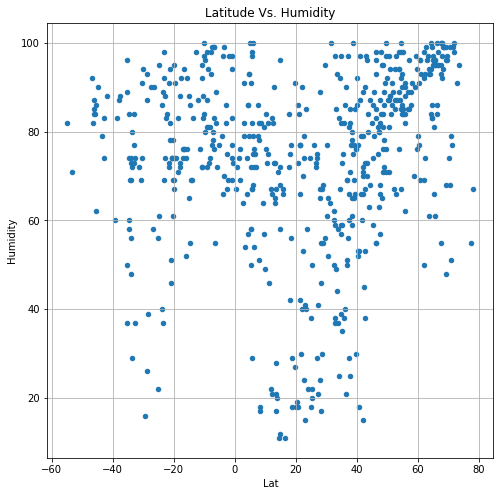

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
              title="Latitude Vs. Humidity")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig(path + "/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

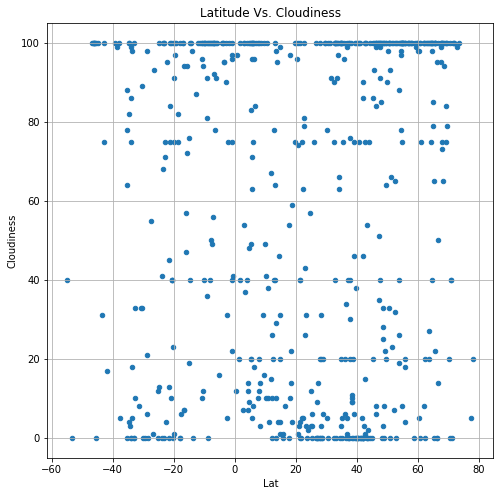

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
              title="Latitude Vs. Cloudiness")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig(path + "/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

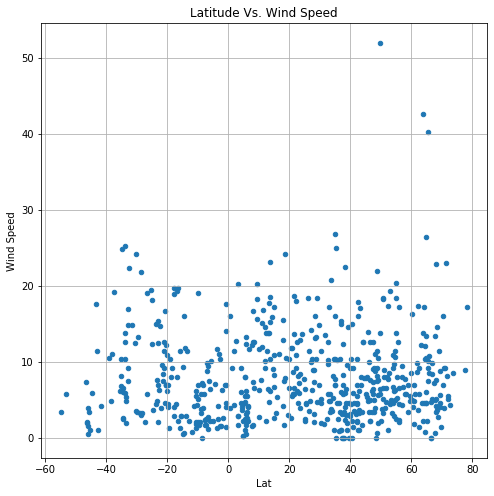

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),
              title="Latitude Vs. Wind Speed")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig(path + "/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


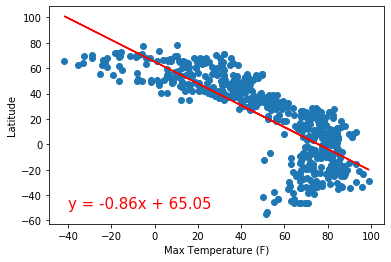

In [14]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Max Temp']
y_values = city_data_df['Lat']
(m, b, r, p, sem) = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40, -50),fontsize=15,color="red")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

north_hem_lats = city_data_df.loc[city_data_df["Lat"] >= 0]
    

northern_hemi_df = pd.DataFrame(north_hem_lats)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,shatoy,42.8714,45.6886,38.93,73,100,1.10,RU,2023-02-02 06:54:28
4,mount vernon,40.9126,-73.8371,31.66,53,75,9.22,US,2023-02-02 06:54:30
6,yellowknife,62.4560,-114.3525,-35.45,74,0,5.75,CA,2023-02-02 06:54:31
10,chokurdakh,70.6333,147.9167,-7.42,99,100,3.98,RU,2023-02-02 06:54:34
13,fort nelson,58.8053,-122.7002,-15.21,70,0,3.44,CA,2023-02-02 06:54:36


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

south_hem_lats = city_data_df.loc[city_data_df["Lat"] < 0]

southern_hemi_df = pd.DataFrame(south_hem_lats)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-gentil,-0.7193,8.7815,78.76,94,75,4.61,GA,2023-02-02 06:54:26
1,port elizabeth,-33.9180,25.5701,75.09,74,0,10.36,ZA,2023-02-02 06:54:27
3,hithadhoo,-0.6000,73.0833,81.46,73,41,17.58,MV,2023-02-02 06:54:29
5,mar del plata,-38.0023,-57.5575,70.88,87,100,11.01,AR,2023-02-02 06:54:30
7,mataura,-46.1927,168.8643,69.53,85,100,2.15,NZ,2023-02-02 06:54:32


###  Temperature vs. Latitude Linear Regression Plot

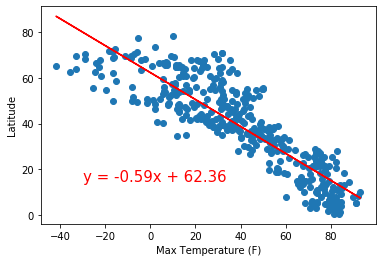

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Max Temp']
y_values = northern_hemi_df['Lat']
(m, b, r, p, sem) = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 15),fontsize=15,color="red")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.show()

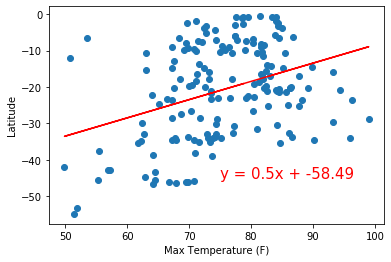

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Max Temp']
y_values = southern_hemi_df['Lat']
(m, b, r, p, sem) = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75, -45),fontsize=15,color="red")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** There is a strong negative correlation between Latitude and Max Temperature in the Northern hemisphere, and a strong positive correlation in the Southern hemisphere.  The closer to get to the equator the warmer it becomes.

### Humidity vs. Latitude Linear Regression Plot

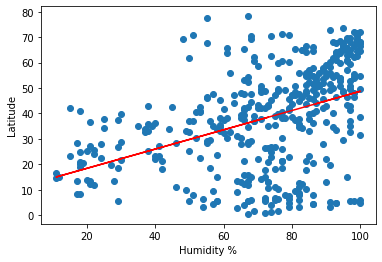

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Lat']
(m, b, r, p, sem) = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 75),fontsize=15,color="red")
plt.xlabel('Humidity %')
plt.ylabel('Latitude')
plt.show()

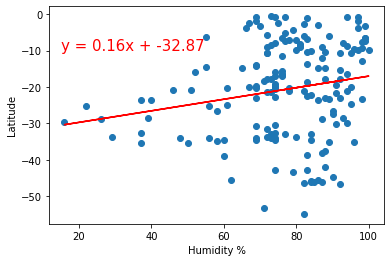

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Lat']
(m, b, r, p, sem) = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15, -10),fontsize=15,color="red")
plt.xlabel('Humidity %')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** Both hemispheres have a positive linear relationship between Latitude and humidity.  As you get closer to the equator the more humid it becomes.  The Northern hemisphere has a stronger positive relationship compared to the Southern hemisphere, based on the angle of the slope suggesting a larger "r".  However there are more outliers observed in the Northern hemisphere which questions confidence in its correlation.

### Cloudiness vs. Latitude Linear Regression Plot

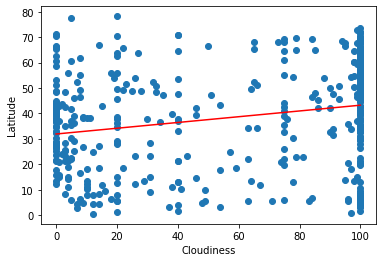

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Cloudiness']
y_values = northern_hemi_df['Lat']
(m, b, r, p, sem) = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15, -10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

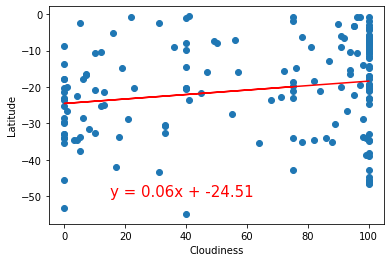

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Cloudiness']
y_values = southern_hemi_df['Lat']
(m, b, r, p, sem) = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15, -50),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** Both hemispheres do not have a strong (nor negative) correlation, suggesting no correlation can be determined between Latitude and Cloudiness.  

### Wind Speed vs. Latitude Linear Regression Plot

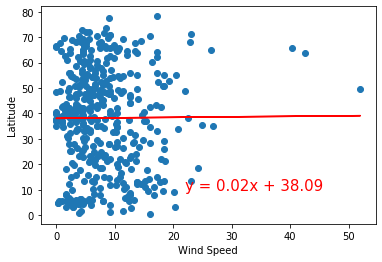

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Wind Speed']
y_values = northern_hemi_df['Lat']
(m, b, r, p, sem) = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22, 10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

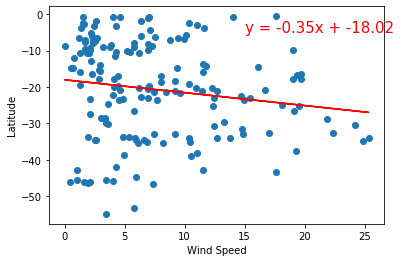

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df['Lat']
(m, b, r, p, sem) = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15, -5),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** The Northern hemisphere has no correlation with Latitude and wind speed.  The Southern hemisphere has a slight negative correlation suggesting the farther south of the equator the windier it becomes.